___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Dealing with Outliers

In statistics, an outlier is a data point that differs significantly from other observations.An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Remember that even if a data point is an outlier, its still a data point! Carefully consider your data, its sources, and your goals whenver deciding to remove an outlier. Each case is different!

## Lecture Goals
* Understand different mathmatical definitions of outliers
* Use Python tools to recognize outliers and remove them

### Useful Links

* [Wikipedia Article](https://en.wikipedia.org/wiki/Outlier)
* [NIST Outlier Links](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)

-------------

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Generating Data

In [2]:
# Choose a mean,standard deviation, and number of samples

def create_ages(mu=50, sigma=13, num_samples=100, seed=42):
  # Set a random seed in the same cell as the random call to get the same values as us
  # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
  np.random.seed(seed)

  sample_ages = np.random.normal(loc=mu, scale=sigma, size=num_samples)
  sample_ages = np.round(sample_ages, decimals=0)

  return sample_ages

In [3]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

## Visualize and Describe the Data

C:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

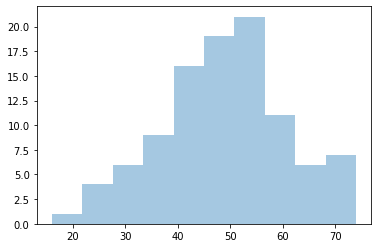

In [6]:
sns.distplot(sample, bins=10, kde=False)

C:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

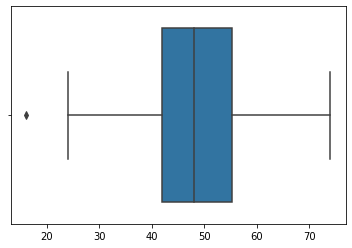

In [7]:
sns.boxplot(sample)

# we do have outliers

In [8]:
ser = pd.Series(sample)

# to find IQR use describe() function
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [15]:
q25 = ser.quantile(q=0.25)
q75 = ser.quantile(q=0.75)
# or
# q25, q75 = np.quantile(ser, q=[0.25, 0.75])

IQR = q75 - q25
lower_limit = ser.quantile(0.25) - (1.5 * IQR)
upper_limit = ser.quantile(0.75) + (1.5 * IQR)

lower_limit, upper_limit

(22.125, 75.125)

## Trimming or Fixing Based Off Domain Knowledge

If we know we're dealing with a dataset pertaining to voting age (18 years old in the USA), then it makes sense to either drop anything less than that OR fix values lower than 18 and push them up to 18.

In [16]:
ser[ser > 18]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [17]:
# It dropped one person
len(ser[ser > 18])

99

In [20]:
def fix_values(age):
  if age < 18:
    age = 18
    
  return age

In [21]:
# "Fixes" one person's age
ser.apply(fix_values)

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 100, dtype: float64

In [22]:
len(ser.apply(fix_values))

100

--------

There are many ways to identify and remove outliers:
* Trimming based off a provided value
* Capping based off IQR or STD
* https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

## Ames Data Set

Let's explore any extreme outliers in our Ames Housing Data Set

In [26]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [27]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<AxesSubplot:>

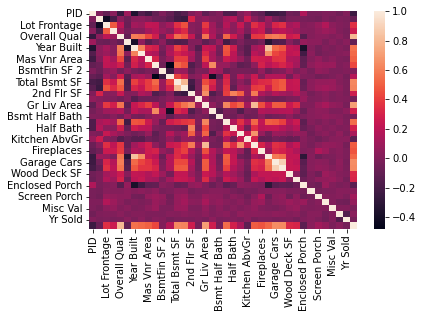

In [28]:
# every feature's correlation with themselves
sns.heatmap(df.corr())

In [29]:
# every single feature's correlation with SalePrice
df.corr()['SalePrice'].sort_values()

# the higher value the more correlated

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

C:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

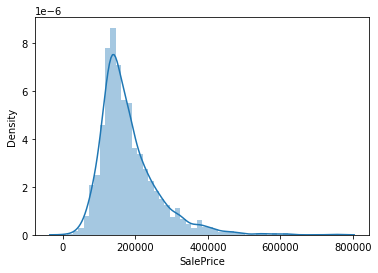

In [30]:
sns.distplot(df["SalePrice"])

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

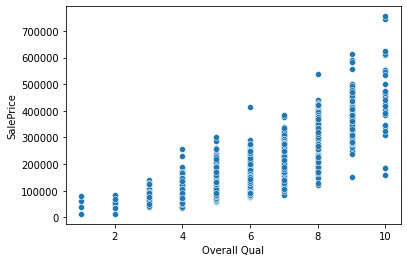

In [31]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

# the higher quality the more expensive

In [32]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

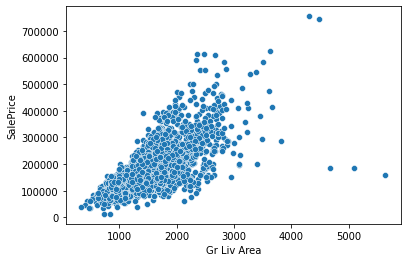

In [33]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [34]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [35]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

In [36]:
ind_drop = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)].index

In [37]:
df = df.drop(ind_drop, axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

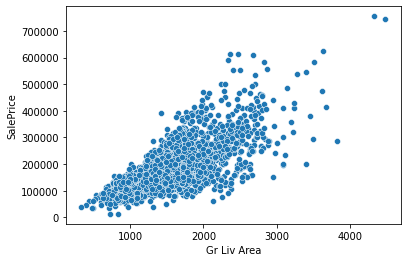

In [38]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

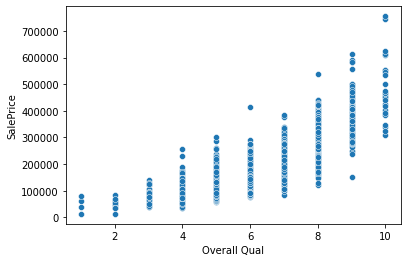

In [39]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

In [40]:
# df.to_csv("Ames_outliers_removed.csv", index=False)

----